In [1]:
import pandas as pd
import datetime
import numpy as np 
import pandas_datareader.data as web
from pandas import Series, DataFrame
from datetime import date
import seaborn as sns
start = datetime.datetime(2017, 1, 1)
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime
now =datetime.now()
end=now.strftime("%m/%d/%Y %H:%M:%S")
end

'05/07/2022 23:17:58'

In [3]:

df = web.DataReader('SPY', 'yahoo', start, end)
# df.iloc[-60:-1]
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-02,415.920013,405.019989,412.070007,414.480011,158312500.0,414.480011
2022-05-03,418.929993,413.359985,415.010010,416.380005,100028200.0,416.380005
2022-05-04,429.660004,413.709991,417.079987,429.059998,144247900.0,429.059998
2022-05-05,425.000000,409.440002,424.549988,413.809998,172929100.0,413.809998
2022-05-06,414.799988,405.730011,411.100006,411.339996,151671300.0,411.339996


In [4]:
all_data=web.DataReader(['SPY', 'NQ=F','^DJI','^RUT','DAX','NKD=F','^VIX','6J=F','6N=F' ,'6c=F', '6A=F','DX=F','CL=F','MGC=F','BIV','BLV','ZN=F','ZT=F','^TNX','^FVX'],'yahoo',start=start,end=end)

In [6]:
close_price =all_data['Close']
open_price=all_data['Open']
High_price =all_data['High'].sort_values('Date',ascending = False)
low_price =all_data['Low'].sort_values('Date',ascending = False)
Volume=all_data['Volume'].sort_values('Date',ascending = False)

In [7]:
close_price.tail()

Symbols,SPY,NQ=F,^DJI,^RUT,DAX,NKD=F,^VIX,6J=F,6N=F,6c=F,6A=F,DX=F,CL=F,MGC=F,BIV,BLV,ZN=F,ZT=F,^TNX,^FVX
Date,,,,,,,,,,,,,,,,,,,,
2022-04-08,447.570007,14327.00,34721.121094,1994.560059,27.660,27030.0,21.160000,0.008042,0.68355,0.79555,0.74605,99.752998,98.260002,1941.599976,79.790001,87.089996,120.125000,105.519531,2.713,2.756
2022-04-11,439.920013,14000.00,34308.078125,1980.319946,27.500,26775.0,24.370001,0.007972,0.68310,0.79225,0.74295,99.924004,94.290001,1944.300049,79.419998,85.849998,119.750000,105.574219,2.780,2.785
2022-04-12,438.290009,13945.00,34220.359375,1986.939941,27.139,26335.0,24.260000,0.007983,0.68600,0.79140,0.74615,100.292000,100.599998,1972.099976,79.809998,85.709999,120.500000,105.835938,2.725,2.676
2022-04-13,443.309998,14221.50,34564.589844,2025.099976,27.490,26980.0,21.820000,0.007962,0.67790,0.79560,0.74455,99.913002,104.250000,1981.000000,79.989998,86.139999,120.796875,105.941406,2.687,2.642
2022-04-14,437.790009,13893.75,34451.230469,2004.979980,27.320,26950.0,22.700001,0.007938,0.67850,0.79305,0.74160,100.325996,106.949997,1970.900024,79.360001,84.769997,119.937500,105.738281,2.828,2.786


In [ ]:
# dfcomp1 = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)
# dfcomp1.pct_change()*100

In [7]:
daily_change=all_data.pct_change()*100

close_present =daily_change['Adj Close'].round(2)
close_present.tail()


Symbols,SPY,NQ=F,^DJI,^RUT,DAX,NKD=F,^VIX,6J=F,6N=F,6c=F,6A=F,DX=F,CL=F,MGC=F,BIV,BLV,ZN=F,ZT=F,^TNX,^FVX
Date,,,,,,,,,,,,,,,,,,,,
2022-05-02,0.60,1.72,0.26,1.01,-0.19,0.49,-3.17,-0.53,-0.84,-0.57,-0.65,0.78,0.46,-2.52,-0.59,-1.18,-0.68,-0.04,3.78,3.37
2022-05-03,0.46,0.11,0.20,0.85,0.53,0.74,-9.55,-0.04,0.32,0.50,0.82,-0.26,-2.62,0.38,0.13,0.82,0.15,-0.07,-1.20,-0.23
2022-05-04,3.05,3.39,2.81,2.69,2.39,1.33,-13.09,1.11,1.22,0.72,1.94,-0.87,5.27,-0.10,0.70,1.01,0.54,0.28,-1.45,-3.56
2022-05-05,-3.55,-4.98,-3.12,-4.04,-3.23,-2.55,22.74,-1.27,-1.62,-0.82,-1.95,1.18,0.42,0.37,-0.87,-2.60,-0.92,-0.20,5.11,4.42
2022-05-06,-0.60,-1.26,-0.30,-1.69,-1.26,0.58,-3.24,-0.14,0.01,-0.38,-0.24,-0.10,1.39,0.38,-0.40,-1.34,-0.22,0.07,1.86,0.63


In [9]:
close_present.describe()


Symbols,SPY,NQ=F,^DJI,^RUT,DAX,NKD=F,^VIX,6J=F,6N=F,6c=F,6A=F,DX=F,CL=F,MGC=F,BIV,BLV,ZN=F,ZT=F,^TNX,^FVX
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,0.066528,0.092679,0.049864,0.042687,0.027940,0.034053,0.421962,-0.002928,0.002136,0.006475,0.005562,-0.002030,-0.178294,0.042392,0.009592,0.018943,-0.001774,-0.001932,0.074808,0.133140
std,1.194743,1.438967,1.257930,1.553736,1.391691,1.290295,9.240016,0.456658,0.594624,0.438335,0.576857,0.377414,9.657706,0.914406,0.289737,0.706383,0.282700,0.067517,3.791012,4.675855
min,-10.940000,-10.840000,-12.930000,-14.270000,-11.320000,-10.960000,-25.910000,-2.830000,-3.180000,-3.280000,-3.550000,-1.530000,-305.970000,-4.990000,-2.400000,-7.520000,-1.450000,-0.830000,-29.320000,-31.380000
25%,-0.320000,-0.450000,-0.350000,-0.620000,-0.560000,-0.550000,-4.600000,-0.260000,-0.360000,-0.240000,-0.330000,-0.240000,-1.040000,-0.360000,-0.130000,-0.320000,-0.160000,-0.030000,-1.360000,-1.590000
50%,0.080000,0.160000,0.080000,0.080000,0.050000,0.070000,-0.740000,0.000000,0.010000,0.000000,0.010000,0.000000,0.240000,0.060000,0.020000,0.070000,0.000000,0.000000,0.000000,0.000000
75%,0.590000,0.790000,0.550000,0.800000,0.700000,0.670000,3.580000,0.250000,0.380000,0.240000,0.360000,0.220000,1.360000,0.510000,0.160000,0.380000,0.160000,0.020000,1.370000,1.660000
max,9.060000,9.710000,11.370000,9.390000,9.650000,9.400000,115.600000,3.010000,2.540000,2.090000,2.240000,2.030000,37.660000,5.950000,2.670000,4.910000,1.670000,0.350000,49.900000,43.120000


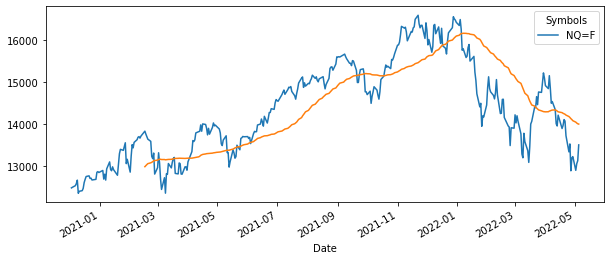

In [8]:
#close_price[['NQ=F']].plot(figsize=(10,4))
qqq=open_price[['NQ=F']].iloc[-360:-1]
open_price[['NQ=F']].iloc[-360:-1].plot(figsize=(10,4))
qqq['ma50']=qqq.rolling(50).mean()
qqq['ma50'].plot(figsize=(10,4))
plt.show()
# y1= close_price['NQ=F']
# y2= open_price['NQ=F']

# plt.scatter(close_price['index'],y1,label='close price graph')
# plt.scatter(close_price['index'],y2,label='open price graph')
# plt.legend()
# plt.show()

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

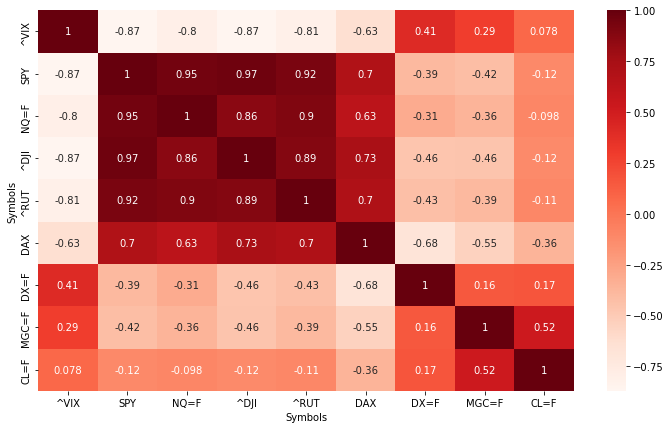

In [9]:
 fitures = close_present[['^VIX','SPY', 'NQ=F','^DJI','^RUT','DAX','DX=F','MGC=F','CL=F']].iloc[-60:-1]
#fitures = close_present[['DX=F','CL=F','MGC=F','6N=F' ,'6c=F', '6A=F','6J=F','ZN=F','ZT=F','^TNX','^FVX']].iloc[-160:-1]
plt.figure(figsize=(12,7))
corr =fitures.corr(method='pearson')
sns.heatmap(corr,cmap='Reds', annot=True)


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

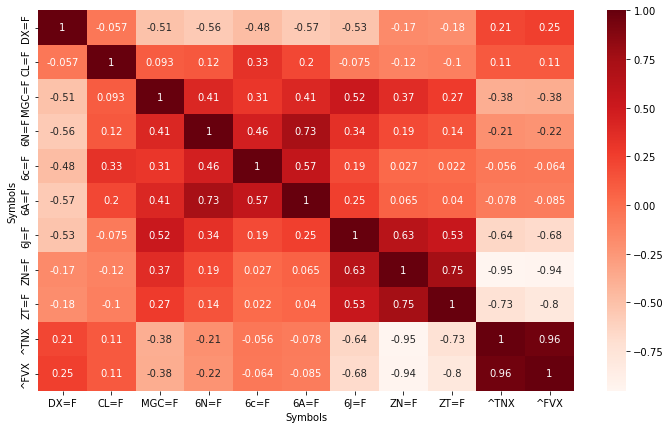

In [13]:
fitures = close_present[['DX=F','CL=F','MGC=F','6N=F' ,'6c=F', '6A=F','6J=F','ZN=F','ZT=F','^TNX','^FVX']].iloc[-1730:-760]
plt.figure(figsize=(12,7))#תשואה5, תשואה10 ,אג"ח2, אג"ח10, אוסף אג"ח5,אוסף אג"ח10,זהב ,נפט, דולר                                           
corr =fitures.corr(method='pearson')
sns.heatmap(corr,cmap='Reds', annot=True)

<AxesSubplot:xlabel='SPY', ylabel='^DJI'>

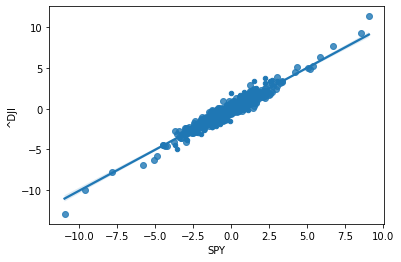

In [10]:
close_present1=close_present.iloc[-60:-1]
close_present1.plot.scatter(x = 'SPY', y = 'NQ=F')
sns.regplot(data=close_present, x='SPY', y='^DJI')

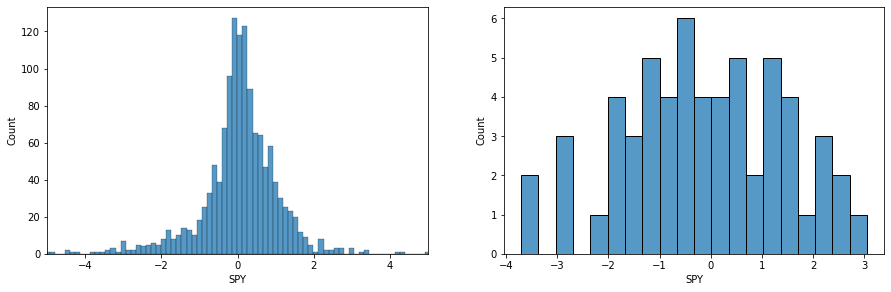

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.histplot(close_present1['SPY'],bins=20)
#plt.xlim(-15,15)
plt.subplot(2,2,1)
sns.histplot(close_present['SPY'],bins=150)
plt.xlim(-5,5)
#plt.ylim(0,100)
plt.show()

In [168]:
#sns.histplot(np.log2(close_present['^VIX']))
#plt.xlim(-25,25)


(1.0, 20.0)

<Figure size 1080x720 with 0 Axes>

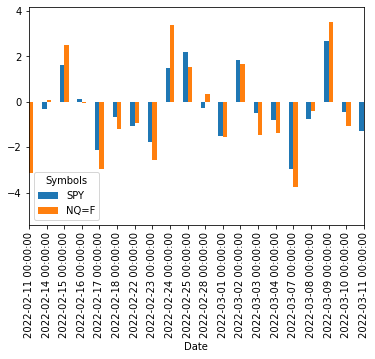

In [15]:
plt.figure(figsize=(15,10))
close_present1[['SPY','NQ=F']].plot.bar()
plt.xlim(1,20)

<AxesSubplot:ylabel='Count'>

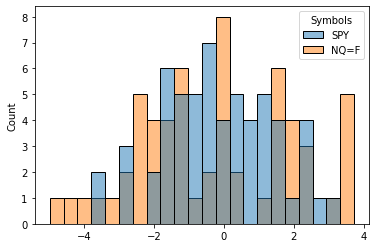

In [16]:
#close_present1[['SPY','NQ=F']].plot.hist(bins=20,alpha=0.7)
sns.histplot(close_present1[['SPY','NQ=F']],bins=22)

<AxesSubplot:>

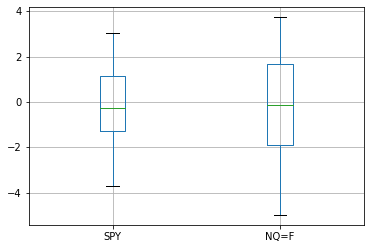

In [17]:
close_present1.boxplot(column=['SPY', 'NQ=F'])

In [210]:
#Volume[['NQ=F','DAX','BIV']].plot(figsize=(10,4))

In [21]:
close_price.reset_index(inplace=True)


In [ ]:
close_price.head()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
a=close_price.dropna()
Y_s = a['SPY'] ## חיזוי של הדאטה לוקחים ערכים מפצלים ל4 עושים עץ ועושים חיזוי
X_s = a[['index']]# את מה שרוצים לחזות שמים בוואי ומה שאיתו עושים חיזוי שמים באיקס 
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_s, Y_s, test_size=0.3, random_state=1) 

regression = LinearRegression()
regression.fit(X_train, y_train)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)
y_pred = (regression.predict(X_test))
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

regression coefficient [0.16933509]
regression intercept 205.91702848696707


In [215]:
regression_confidence = regression.score(X_test, y_test)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.8514376874293728


slope BX is 8.194897902715503
intercept A is 3871.3289439334903


Text(0, 0.5, 'Dependent variable y')

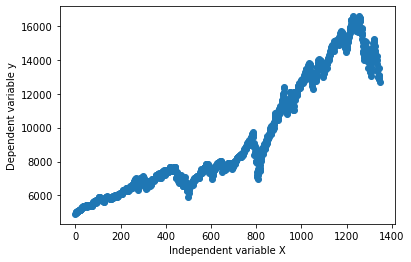

In [23]:
a=close_price#.iloc[-300:-1].dropna()
x1 = a['index'] 
y1 = a['NQ=F']
n = np.size(x1)
  
x_mean = np.mean(x1)
y_mean = np.mean(y1)
x_mean,y_mean
  
Sxy = np.sum(x1*y1)- n*x_mean*y_mean
Sxx = np.sum(x1*x1)-n*x_mean*x_mean
  
BX = Sxy/Sxx
A = y_mean-BX*x_mean
print('slope BX is', BX)
print('intercept A is', A)
  
plt.scatter(x1,y1)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

Text(0, 0.5, 'y1')

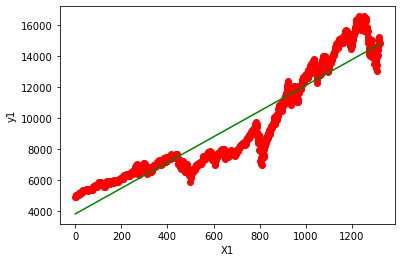

In [217]:
y_pred = BX * x1 + A
  
plt.scatter(x1, y1, color = 'red')
plt.plot(x1, y_pred, color = 'green')
plt.xlabel('X1')
plt.ylabel('y1')
# plt.xlim(1250,1900)

1368.944901187269

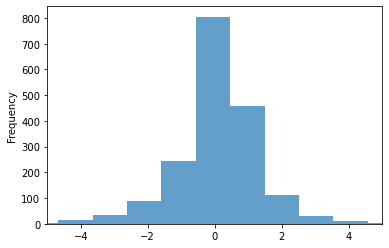

In [99]:

close_present['NQ=F'].plot.hist(bins=20,alpha=0.7)
plt.xlim(-5,5)
close_price['NQ=F'].iloc[-365:-1].std()

In [218]:
error = y1 - y_pred
se = np.sum(error**2)
print('squared error is', se)
  
mse = se/n 
print('mean squared error is', mse)
  
rmse = np.sqrt(mse)
print('root mean square error is', rmse)
  
SSt = np.sum((y1 - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 1794240285.1078835
mean squared error is 1357216.5545445413
root mean square error is 1164.996375335366
R square is 0.8804563706883218


## Y= 11.08x+14179.78

In [14]:

all_data["date"] = pd.to_datetime(all_data.index)
# inc = all_data.Close>all_data.Open
# dec = all_data.Open>all_data.Close
all_data[["date"]]
close_price.tail()

Symbols,SPY,NQ=F,^DJI,^RUT,DAX,NKD=F,^VIX,6J=F,6N=F,6c=F,6A=F,DX=F,CL=F,MGC=F,BIV,BLV,ZN=F,ZT=F,^TNX,^FVX
Date,,,,,,,,,,,,,,,,,,,,
2022-03-31,451.640015,14868.75,34678.351562,2070.129883,28.110001,27585.0,20.559999,0.008225,0.69240,0.80105,0.74890,98.360001,100.279999,1949.199951,81.900002,91.690002,122.875000,106.570312,2.327,2.422
2022-04-01,452.920013,14863.75,34818.269531,2091.110107,28.520000,27840.0,19.629999,0.008157,0.69055,0.79925,0.74970,98.626999,99.269997,1919.099976,81.339996,91.910004,122.234375,105.683594,2.377,2.549
2022-04-04,456.799988,15164.25,34921.878906,2095.439941,28.566999,28040.0,18.570000,0.008145,0.69510,0.80090,0.75495,98.973999,103.279999,1929.199951,81.440002,91.639999,122.093750,105.691406,2.412,2.555
2022-04-05,451.029999,14828.00,34641.179688,2046.040039,28.129999,27565.0,21.030001,0.008092,0.69540,0.80175,0.75955,99.428001,101.959999,1922.900024,80.589996,89.650002,120.921875,105.531250,2.556,2.696
2022-04-06,NaN,14602.25,NaN,NaN,NaN,27225.0,23.170000,0.008092,0.69490,0.80095,0.75830,99.400002,103.220001,1928.000000,NaN,NaN,120.453125,105.464844,2.613,2.738


In [19]:
data = web.DataReader(['SPY','MSFT','QQQ','BABA'], 'yahoo', start, end)

In [17]:

close_price1 =data['Close']
comper =close_price1.pct_change()*100
open_price1=data['Open'].sort_values('Date',ascending = False)
High_price1 =data['High'].sort_values('Date',ascending = False)
low_price1 =data['Low'].sort_values('Date',ascending = False)
Volume1=data['Volume']

In [18]:
last60=comper.iloc[-60:-1]
comper.describe()
#last60.describe()

Symbols,SPY,MSFT,QQQ,BABA
count,1324.000000,1324.000000,1324.000000,1324.000000
mean,0.058727,0.133855,0.092125,0.047084
std,1.200489,1.751436,1.441415,2.608853
min,-10.942374,-14.739031,-11.978784,-13.342179
25%,-0.330203,-0.593865,-0.435605,-1.227653
50%,0.078454,0.128346,0.153225,0.037887
75%,0.592699,1.004045,0.783409,1.378292
max,9.060326,14.216888,8.470555,36.763940


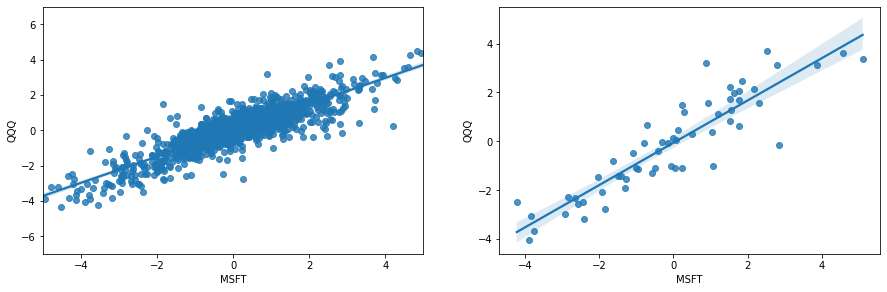

In [223]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.regplot(data=last60, x='MSFT', y='QQQ')
plt.subplot(2,2,1)
sns.regplot(data=comper, x='MSFT', y='QQQ')
plt.xlim(-5,5)
plt.ylim(-7,7)
plt.show()

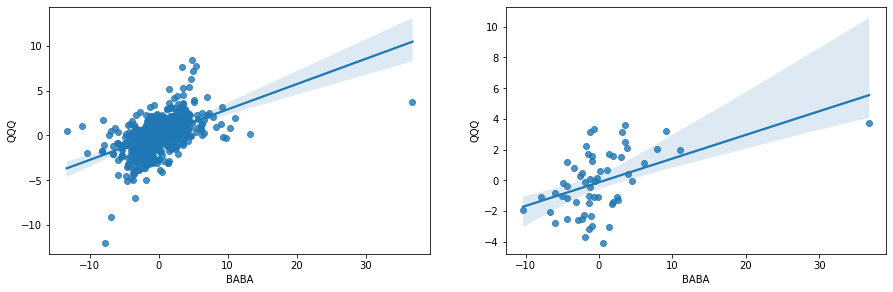

In [224]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.regplot(data=last60, x='BABA', y='QQQ')
plt.subplot(2,2,1)
sns.regplot(data=comper, x='BABA', y='QQQ')
#plt.xlim(-5,5)
#plt.ylim(-7,7)
plt.show()

(-10.0, 10.0)

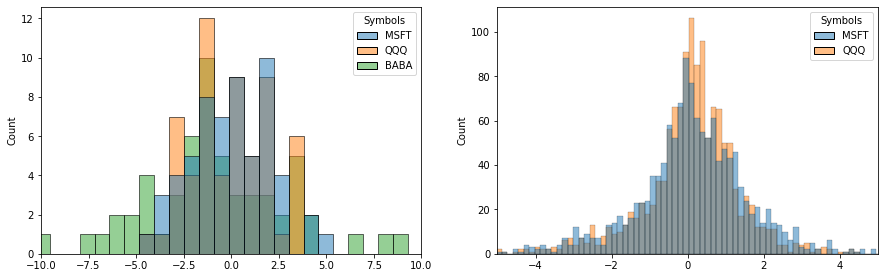

In [225]:
#last60[['MSFT','QQQ']].plot.hist(bins=20,alpha=0.5)
#comper[['MSFT','QQQ']].plot.hist(bins=20,alpha=0.5)
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.histplot(comper[['MSFT','QQQ']],bins = 200)
plt.xlim(-5,5)
plt.subplot(2,2,1)
sns.histplot(last60[['MSFT','QQQ','BABA']],bins = 60)
plt.xlim(-10,10)

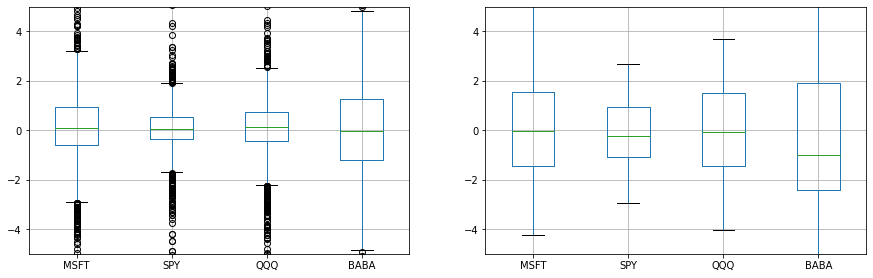

In [184]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
last60.boxplot(column=['MSFT','SPY','QQQ','BABA'])
plt.ylim(-5,5)
plt.subplot(2,2,1)
comper.boxplot(column=['MSFT','SPY','QQQ','BABA'])
plt.ylim(-5,5)
#plt.ylim(0,100)
plt.show()

Text(0.5, 1.0, 'last 5 years')

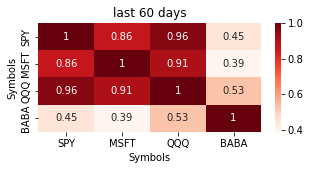

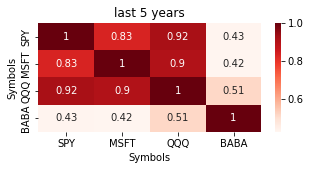

In [19]:
fitures = last60
plt.figure(figsize=(5,2))
corr =fitures.corr(method='pearson')
sns.heatmap(corr,cmap='Reds', annot=True)
plt.title('last 60 days')
fitures = comper
plt.figure(figsize=(5,2))
corr =fitures.corr(method='pearson')
sns.heatmap(corr,cmap='Reds', annot=True)
plt.title('last 5 years')